In [1]:
import math
import pandas as pd
import random
import seaborn as sns
import statistics as stats
import warnings

In [2]:
## Uncomment and run this cell to reset the state and get reproducible results
# random.seed(a="seed dated: 2020-07-23")

In [3]:
# Code for configuration of global parameters
pd.options.display.max_columns = None
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set(rc={"figure.figsize": (10, 8)})

In [31]:
# The number of trials for each value of k
trials = 200

In [32]:
def min_max(a, b, c):
    """
    Returns the maximum possible and the minimum possible root from
    the given parameters. It returns None if no real roots exist.
    """
    dsquared = b * b - 4 * a * c
    
    # We only consider real roots
    if dsquared < 0:
        return None
    
    d = math.sqrt(dsquared)
    twoa = 2 * a
    minroot = (-b - d) / twoa
    maxroot = (-b + d) / twoa
    return (minroot, maxroot)

In [33]:
def get_row_of_data_for(k):
    """
    Returns a row of data by performing an experiment for the given
    value of k. The values returned are:
    1. k
    2. Mean of the maximum roots
    3. Mean of the minimum roots
    4. Std dev of the maximum roots
    5. Std dev of the minimum roots
    """
    max_roots = []
    min_roots = []

    for current_trial in range(trials):
        # We loop until we get valid roots
        roots = None
        while roots is None:
            # We chose from 1 (inclusive) to k (inclusive)
            a = random.randrange(1, k + 1)
            b = random.randrange(1, k + 1)
            c = random.randrange(1, k + 1)

            roots = min_max(a, b, c)

        # unpack the data
        minroot, maxroot = roots
        max_roots.append(maxroot)
        min_roots.append(minroot)
    
    return [
        k,
        stats.mean(max_roots), stats.mean(min_roots),
        stats.stdev(max_roots), stats.stdev(min_roots)
    ]

In [34]:
data = [get_row_of_data_for(k) for k in range(10, 501, 10)]

In [35]:
df = pd.DataFrame(
    data, columns=[
        "k",
        "Mean of the maximum roots",
        "Mean of the minimum roots",
        "Std dev of the maximum roots",
        "Std dev of the minimum roots"
    ]
)
df

,k,Mean of the maximum roots,Mean of the minimum roots,Std dev of the maximum roots,Std dev of the minimum roots
0,10,-0.609479,-3.364922,0.482203,2.584621
1,20,-0.526764,-4.204216,0.480828,4.203683
2,30,-0.540209,-4.267918,0.502916,5.032358
3,40,-0.532580,-5.113783,0.520543,6.360032
4,50,-0.541056,-5.182687,0.553337,7.295609
5,60,-0.544474,-5.796774,0.537402,8.516698
6,70,-0.535601,-5.803693,0.572777,10.010059
7,80,-0.552587,-5.880018,0.484900,8.945424
8,90,-0.597791,-5.629544,0.687419,9.451273
9,100,-0.523780,-6.795700,0.558710,11.083820


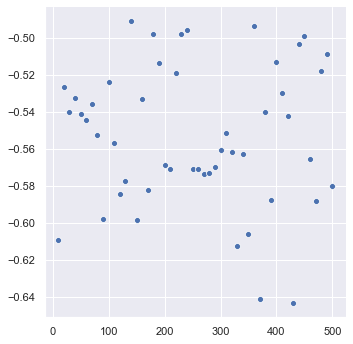

In [36]:
try:
    sns.relplot(x=df["k"],y=df["Mean of the maximum roots"],data=df)
except:
    pass

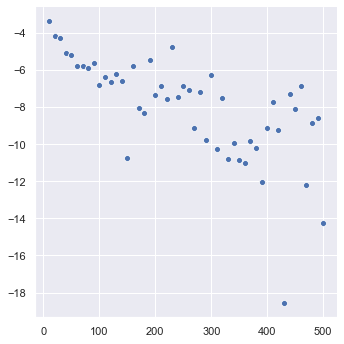

In [37]:
try:
    sns.relplot(x=df["k"],y=df["Mean of the minimum roots"],data=df)
except:
    pass

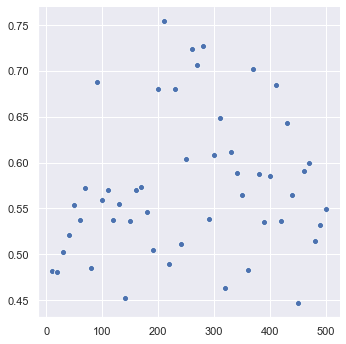

In [38]:
try:
    sns.relplot(x=df["k"],y=df["Std dev of the maximum roots"],data=df)
except:
    pass

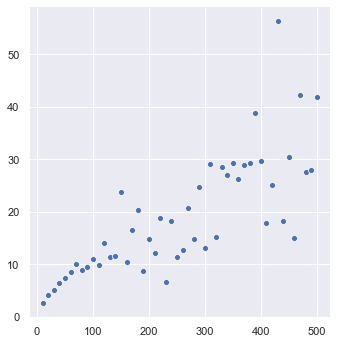

In [39]:
try:
    sns.relplot(x=df["k"],y=df["Std dev of the minimum roots"],data=df)
except:
    pass